1. **Download and Save the LHE File:**
   - Go on the given link: [top.lhe](https://www.ppe.gla.ac.uk/~abuckley/top.lhe)
   - Right-click on the page and select **View Page Source**.
   - Copy all the XML content from the source.
   - Open Notepad (or any text editor) and paste the copied content.
   - Save the file with the name `top.lhe` (choose "All Files" as the file type).

2. **Install pylhe:**
   - Go to VS code and open the same directory where you saved the file or move the file in your workspace in vs code
   - Open your terminal or command prompt.
   - Run the following command:
     ```bash
     pip install pylhe
     ```


In [1]:
import pylhe

## Task 2(a) Parsing an MC event file
Write a Python script that:
- Reads the file (you should use existing libraries for this)
- Extracts and print basic summary information (e.g., number of total and final particles, momentum sums) for each event in the file
- Plots the transverse-momentum distribution of the top quarks in the events

Explain why you presented the pT plot the way you did.

In [3]:
file_path = './top.lhe'
lhe = pylhe.read_lhe_file(file_path)
print(lhe)
    

In [4]:

output_file ='./basic_events_info.txt'

with open(output_file, 'w') as f:
    def print_to_file(*args, **kwargs):
        print(*args, **kwargs)
        print(*args, **kwargs, file=f)
    print_to_file("Initial information")
    
    print_to_file("-"*40)
    for key, value in lhe.init["initInfo"].items():
        print_to_file(key, value)
    print_to_file("-"*40)
    
    events = list(lhe.events)
    print_to_file("Total number of events: ", len(events))   
    print_to_file("-"*40)
    
    print_to_file("Events information")
    print_to_file("-"*40)
    for i,event in enumerate(events):
        eventInfo = event.eventinfo
        
        particles = list(event.particles)
        final_particles = [p for p in particles if p.status == 1]
        initial_particles = [p for p in particles if p.status == -1]
        intermediate_particles = [p for p in particles if p.status == 2]
                
        sum_px = sum(p.px for p in particles)
        sum_py = sum(p.py for p in particles)
        sum_pz = sum(p.pz for p in particles)
        sum_E  = sum(p.e for p in particles)
        
        print_to_file("-"*40)
        print_to_file("Event ", i+1)
        
        print_to_file("Total number of particles: ", eventInfo.nparticles)
        print_to_file("Initial-State Particles: ",len(initial_particles))
        print_to_file("Final-State Particles: ",len(final_particles))
        print_to_file("Intermediate Particles: ",len(intermediate_particles))
        
        print_to_file(f"Momentum Sums: px = {sum_px:.3f}, py = {sum_py:.3f}, pz = {sum_pz:.3f}")
        print_to_file(f"Total Energy: {sum_E:.3f}")
        
        print_to_file("Process ID used to generate event: ", eventInfo.pid)
        print_to_file("Event Weight: ", eventInfo.weight)
        print_to_file("Energy Scale: ", eventInfo.scale)
        print_to_file("Electromagnetic Coupling Constant: ", eventInfo.aqed)
        print_to_file("Strong Coupling Constant: ", eventInfo.aqcd)
        print_to_file("-"*40)

Initial information
----------------------------------------
beamA 2212.0
beamB 2212.0
energyA 6500.0
energyB 6500.0
PDFgroupA 0.0
PDFgroupB 0.0
PDFsetA 247000.0
PDFsetB 247000.0
weightingStrategy -4.0
numProcesses 3.0
----------------------------------------
Total number of events:  991
----------------------------------------
Events information
----------------------------------------
----------------------------------------
Event  1
Total number of particles:  13.0
Initial-State Particles:  2
Final-State Particles:  7
Intermediate Particles:  4
Momentum Sums: px = -26.725, py = -154.789, pz = -4030.486
Total Energy: 4364.430
Process ID used to generate event:  2.0
Event Weight:  14.674046
Energy Scale:  178.3492
Electromagnetic Coupling Constant:  0.007546771
Strong Coupling Constant:  0.1169709
----------------------------------------
----------------------------------------
Event  2
Total number of particles:  13.0
Initial-State Particles:  2
Final-State Particles:  7
Intermediate

Top quarks are elementary particles and a fundamental constituent of matter in particle physics. They are the heaviest of all observed elementary particles, with a mass over 61,000 times more massive than the up quark.

Now here in .lhe file the top quarks are represented by Monte Carlo particle number 6 and anti-top quark by -6, and we are including both in our graph

This is because including both increases the number of data points in the pt distribution, which improves the statistical significance of any features or comparisons with theoretical predictions.

lastly because the value of pt is in float, so I am using histogram to divite the pt values in total 70 bins (just got through selecting different values)

Number of top quarks found: 1879


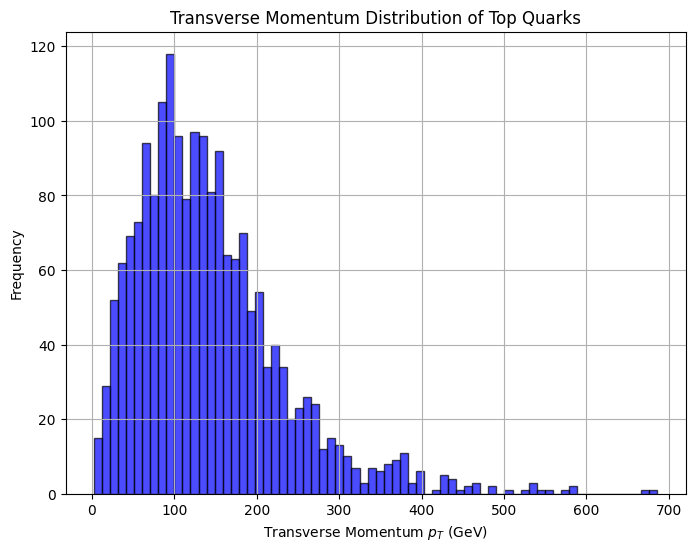

In [5]:
import matplotlib.pyplot as plt
import math

top_quark_trans_momentum = []

for event in events:
    for particle in event.particles:
        if abs(particle.id) == 6:
            pt = math.sqrt(particle.px**2 + particle.py**2)
            top_quark_trans_momentum.append(pt)

print(f"Number of top quarks found: {len(top_quark_trans_momentum)}")

plt.figure(figsize=(8, 6))
plt.hist(top_quark_trans_momentum, bins=70, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel("Transverse Momentum $p_T$ (GeV)")
plt.ylabel("Frequency")
plt.title("Transverse Momentum Distribution of Top Quarks")
plt.grid(True)
plt.show()


## Task 2(b) Basic event-graph rendering
Write a Python script that:
- Represents a simple particle interaction (e.g., e⁺ e⁻ → μ⁺ μ⁻) as a node-edge diagram using pydot or NetworkX and Matplotlib.
- Bonus: Output the graph as an interactive HTML file using e.g. Plotly or D3.js.

Explain your design choices in your choice of rendering tools and parameters.

below is the diagram that we would be trying to make

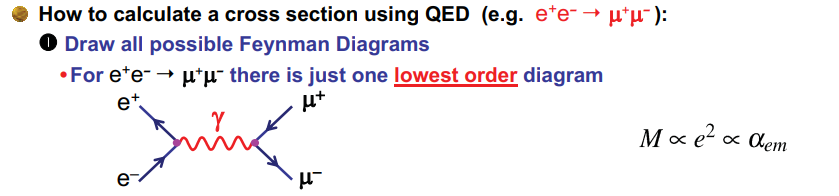

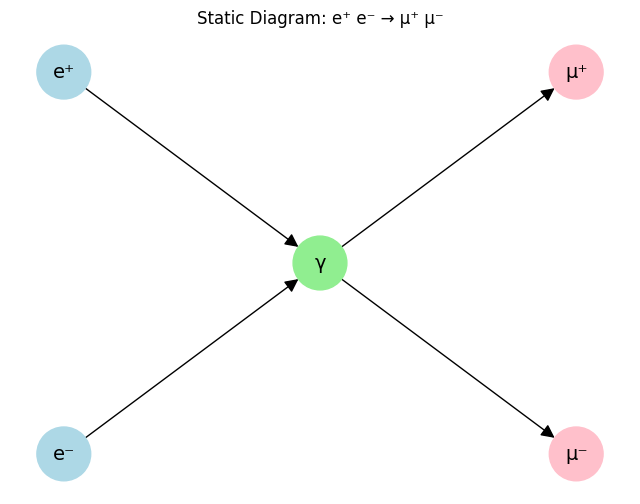

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import math

G = nx.DiGraph()

G.add_node("e⁺", color="lightblue")
G.add_node("e⁻", color="lightblue")
G.add_node("γ", color="lightgreen")
G.add_node("μ⁺", color="pink")
G.add_node("μ⁻", color="pink")


G.add_edge("e⁺", "γ")
G.add_edge("e⁻", "γ")
G.add_edge("γ", "μ⁺")
G.add_edge("γ", "μ⁻")


pos = {
    "e⁺": (0, 1),
    "e⁻": (0, -1),
    "γ": (1, 0),
    "μ⁺": (2, 1),
    "μ⁻": (2, -1)
}

node_colors = [G.nodes[n]["color"] for n in G.nodes()]

plt.figure(figsize=(8, 6))
nx.draw_networkx(G, pos, with_labels=True, node_color=node_colors,
                 node_size=1500, font_size=14, arrowstyle='-|>', arrowsize=20)
plt.title("Static Diagram: e⁺ e⁻ → μ⁺ μ⁻")
plt.axis("off")
plt.show()





In [7]:
node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=2, color="#888"),
    hoverinfo="none",
    mode="lines"
)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode="markers+text",
    text=list(G.nodes()),
    textposition="bottom center",
    hoverinfo="text",
    marker=dict(
        color=node_colors,
        size=20,
        line_width=2
    )
)

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title=dict(text="Interactive Diagram: e⁺ e⁻ → μ⁺ μ⁻", font=dict(size=16)),
                    showlegend=False,
                    hovermode="closest",
                    margin=dict(b=20, l=5, r=5, t=40),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
                ))

fig.write_html("./particle_interaction_networkx.html")


I chose networkx beause I am familiar in writing code in it, also it is easily translated to pyplot which i am also familiar with.

I had to learn some basic knoweledge of feymann diagram to work with it.

## Task 2(c) Basic Web Rendering
Create a simple Flask server that:
- Creates JSON representing a particle-collision event from an LHE file
- Serves an endpoint (/event) that returns this JSON
- Uses a front-end script (HTML/JavaScript) to fetch and display an interactions graph or other event rendering in the browser.

How would you navigate efficiently between rendering different events in the file? What about in a user-supplied file? Discuss the issues.

### Handling Different Events and User-Supplied Files

To efficiently navigate between rendering different events in the file and user-supplied files, we can use unique IDs for each event and file. Our JSON object would contain a list of objects, each corresponding to a file. Each file object would have some initial information and an ID. Within each file object, there would be a list of objects where each object corresponds to an event.That each object woould again be having an ID and information related to that event. Then we can have an endpoint as (/file_id/event_id) to handle json related to each event. More over we can also serve single json for each file's whole events at end point (/file_id), and apply pagenation since events associated with each file can be huge. These 2 endpoints can handle most of the cases. 
And as for user supplied file, first we can pass it through the tools like pylhe that I have used and then make json out of it, and then serve the endpoints related to it. 

### Example JSON Structure
```JSON
{
    "files": [
        {
            "file_id": "file_1",
            "file_name": "top.lhe",
            "events": [
                {
                    "event_id": "event_1",
                    "initial_particles": [...],
                    "final_particles": [...],
                    "intermediate_particles": [...],
                    "momentum_sums": {
                        "px": ...,
                        "py": ...,
                        "pz": ...,
                        "E": ...
                    },
                    "event_info": {
                        "pid": ...,
                        "weight": ...,
                        "scale": ...,
                        "aqed": ...,
                        "aqcd": ...
                    }
                },
                ...
            ]
        },
        ...
    ]
}```


The task 2(c) is attached in app.py. Use below command to run the app
```bash
flask --app app run
```
